# Creating anime recognizer


In [1]:
from fastai.vision import *

## View data

In [6]:
data.classes

['gohan', 'goku', 'vegeta']

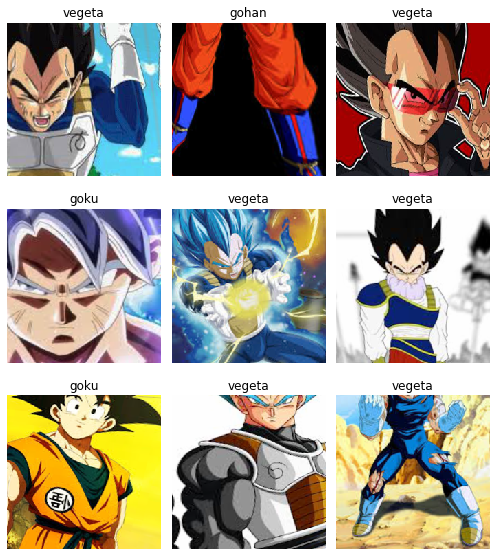

In [7]:
data.show_batch(rows=3, figsize=(7,8))

In [8]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['gohan', 'goku', 'vegeta'], 3, 240, 59)

## Train model

In [9]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [10]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.771351,1.076945,0.406780,00:49
1,1.434786,0.772842,0.338983,00:38
2,1.136820,0.816232,0.220339,00:37
3,0.982626,0.798057,0.220339,00:36


In [11]:
learn.save('stage-1')

In [12]:
learn.unfreeze()

In [13]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


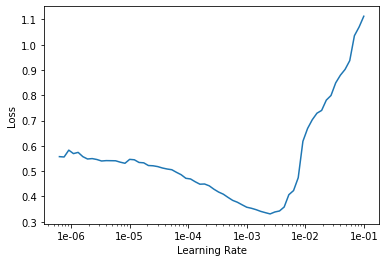

In [14]:
learn.recorder.plot()

In [15]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.472732,0.706870,0.220339,00:40
1,0.516968,0.715284,0.254237,00:39


In [16]:
learn.save('stage-2')

In [28]:
defaults.device = torch.device('cpu')

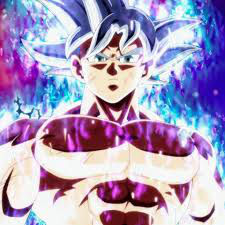

In [29]:
img = open_image(path/'goku'/'00000021.jpg')
img

In [30]:
learn = load_learner(path)

In [ ]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Implementing an UI using tkinter

In [68]:
from tkinter import filedialog
from tkinter import *
from tkinter import messagebox
from PIL import Image,ImageTk

In [ ]:

window= Tk()
window.config(background="black")
window.title("diabetic retinopathy")
window.geometry('570x350')
global file

def browse():
    global file
    file= filedialog.askopenfilename(initialdir="/",title="select image",filetypes=(("jpeg files","*.jpg"),("all files","*.*")))
    img1= Image.open(file)
    render=ImageTk.PhotoImage(img1)
    img=Label(window,image=render)
    img.image=render
    img.place(x=170,y=10)
    return(img1)


def out():
    cat=learn.predict(open_image(file))
    messagebox.showinfo("selected image is:-",cat[0])
    


btn1=Button(window, text="select image", command=browse)
btn1.config(height=1,width=20)
btn1.place(x=10, y=300)

btn2=Button(window, text="scan",command=out)
btn2.config(height=1,width=20)
btn2.place(x=210, y=300)

btn3=Button(window, text="close", command=window.destroy)
btn3.config(height=1,width=20)
btn3.place(x=410,y=300)

window.mainloop()